In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the data
data = pd.read_csv('Wash.dat', sep='\t')

# Display first few rows to verify
print(data.head())


   Vendor  Cleanliness
0       1        682.2
1       1        695.7
2       1        737.1
3       1        679.5
4       1        686.9


In [3]:
import pandas as pd

# Load the data
data = pd.read_csv('Wash.dat', sep='\t')

# Group data by Vendor and calculate descriptive statistics
descriptive_stats = data.groupby('Vendor')['Cleanliness'].describe()
print(descriptive_stats)

# Specific mean for Vendor 1 (which corresponds to 'Acme')
acme_mean = descriptive_stats.loc[1, 'mean']
print(f"Mean of ACME (Vendor 1): {acme_mean}")


        count     mean        std    min      25%     50%      75%    max
Vendor                                                                   
1        20.0  693.945  25.626066  647.8  678.000  693.80  701.025  748.3
2        20.0  681.770   9.972705  661.1  678.050  683.15  689.625  694.7
3        20.0  669.575  24.379000  623.1  663.425  669.40  678.950  715.7
4        20.0  642.690   3.080482  635.2  640.800  643.25  645.100  647.3
5        20.0  616.170  47.165187  529.9  598.050  621.15  654.375  707.9
6        20.0  621.420  16.131258  592.6  610.500  623.40  630.900  651.8
7        20.0  605.690  26.491844  567.8  588.200  600.50  624.050  665.9
Mean of ACME (Vendor 1): 693.9449999999999


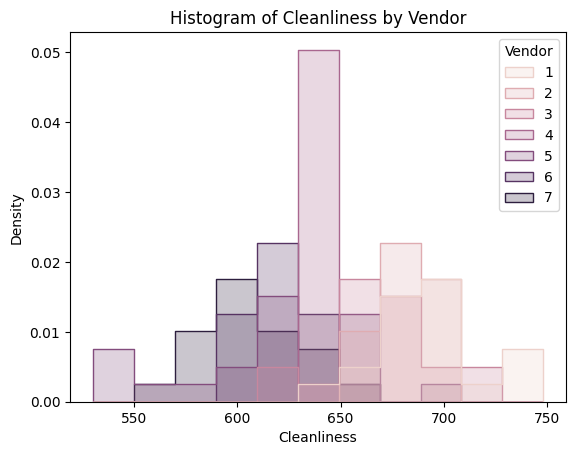

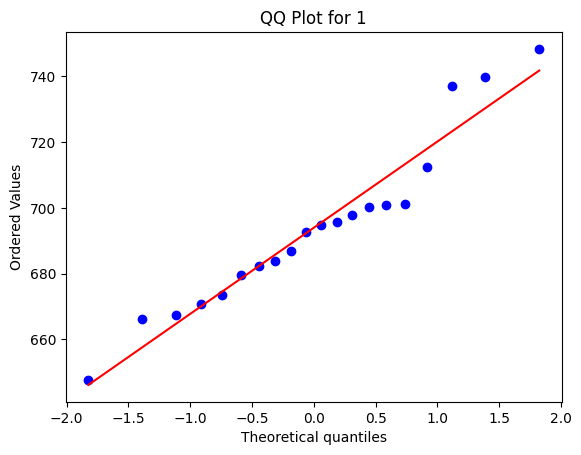

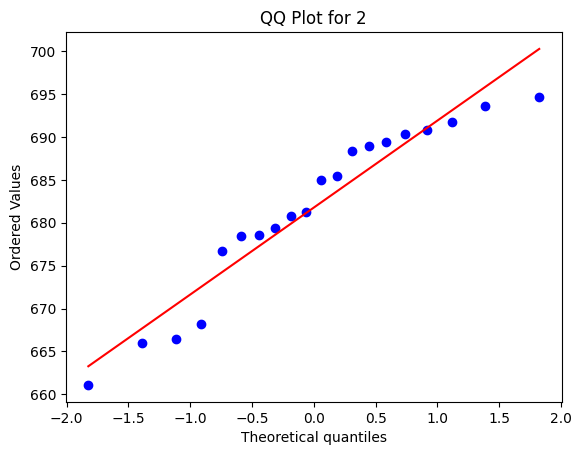

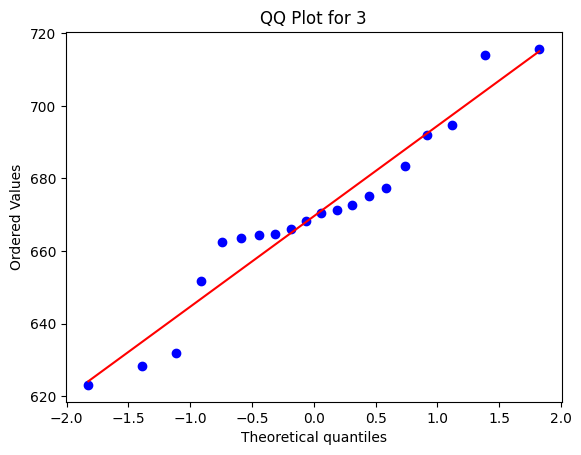

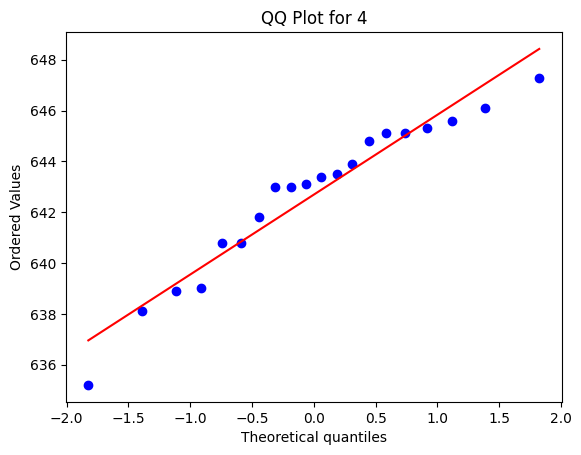

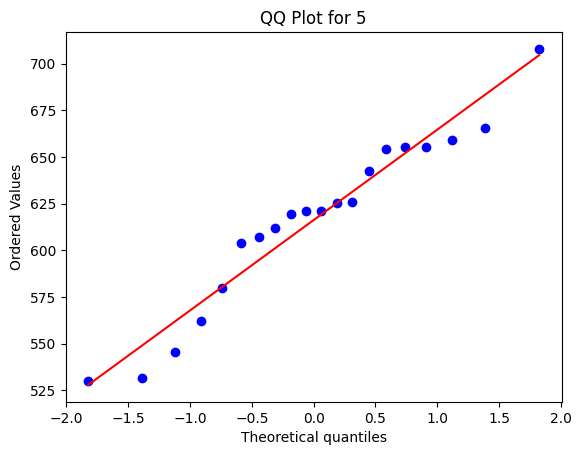

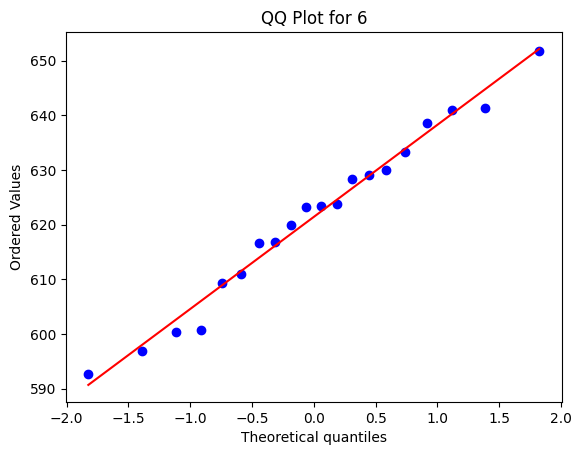

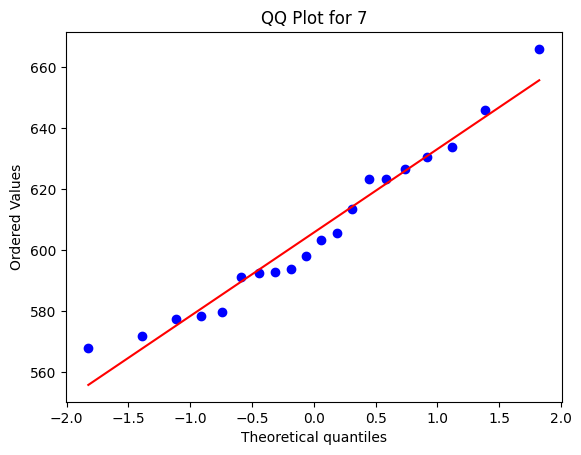

In [4]:
# Histograms
sns.histplot(data=data, x='Cleanliness', hue='Vendor', element='step', stat='density', common_norm=False)
plt.title('Histogram of Cleanliness by Vendor')
plt.show()

# QQ plots
for vendor in data['Vendor'].unique():
    stats.probplot(data[data['Vendor'] == vendor]['Cleanliness'], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {vendor}')
    plt.show()


In [5]:
# Levene's test
levene_stat, levene_p = stats.levene(*[data[data['Vendor'] == vendor]['Cleanliness'] for vendor in data['Vendor'].unique()])
print(f"Levene's Test Statistic: {levene_stat}, p-value: {levene_p}")


Levene's Test Statistic: 8.06387665927131, p-value: 1.9538748154043076e-07


In [6]:
# ANOVA
model = ols('Cleanliness ~ C(Vendor)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                  sum_sq     df          F        PR(>F)
C(Vendor)  145032.087857    6.0  37.215809  3.210442e-26
Residual    86384.739000  133.0        NaN           NaN


In [7]:
# Tukey's HSD
tukey = pairwise_tukeyhsd(endog=data['Cleanliness'], groups=data['Vendor'], alpha=0.05)
print(tukey)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     1      2  -12.175  0.738  -36.3041  11.9541  False
     1      3   -24.37 0.0461  -48.4991  -0.2409   True
     1      4  -51.255    0.0  -75.3841 -27.1259   True
     1      5  -77.775    0.0 -101.9041 -53.6459   True
     1      6  -72.525    0.0  -96.6541 -48.3959   True
     1      7  -88.255    0.0 -112.3841 -64.1259   True
     2      3  -12.195 0.7365  -36.3241  11.9341  False
     2      4   -39.08 0.0001  -63.2091 -14.9509   True
     2      5    -65.6    0.0  -89.7291 -41.4709   True
     2      6   -60.35    0.0  -84.4791 -36.2209   True
     2      7   -76.08    0.0 -100.2091 -51.9509   True
     3      4  -26.885 0.0185  -51.0141  -2.7559   True
     3      5  -53.405    0.0  -77.5341 -29.2759   True
     3      6  -48.155    0.0  -72.2841 -24.0259   True
     3      7  -63.885    0.0  -88.0141 -39.7559

In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Wash.dat', sep='\t')

# Assuming 'Vendor' and 'Cleanliness' are the columns in the dataset
# Group data by Vendor and calculate descriptive statistics
descriptive_stats = data.groupby('Vendor')['Cleanliness'].describe()

# Specific mean for ACME (Vendor 1)
acme_mean = descriptive_stats.loc[1, 'mean']
print(f"Mean of ACME: {acme_mean}")


Mean of ACME: 693.9449999999999


In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Wash.dat', sep='\t')

# Assuming 'Vendor' and 'Cleanliness' are the columns in the dataset
# Group data by Vendor and calculate descriptive statistics
descriptive_stats = data.groupby('Vendor')['Cleanliness'].describe()

# Variance for "Quality R Us" (Vendor 2)
quality_r_us_variance = descriptive_stats.loc[2, 'std'] ** 2
print(f"Variance of Quality R Us: {quality_r_us_variance}")


Variance of Quality R Us: 99.45484210526297


In [10]:
import pandas as pd

# Load the data
data = pd.read_csv('Wash.dat', sep='\t')  # Assuming the data is tab-separated


In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model using OLS
model = ols('Cleanliness ~ C(Vendor)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Extract the p-value
p_value = anova_table["PR(>F)"][0]
print(f"P-value for Hypothesis Set Two: {p_value}")


P-value for Hypothesis Set Two: 3.2104422843351303e-26


In [13]:
if p_value < 0.05:
    conclusion = "6 is a reliable difference between some of the cleanliness means associated with the Treatment Factor Levels."
else:
    conclusion = "There is no reliable difference between some of the cleanliness means associated with the Treatment Factor Levels."

print(conclusion)


6 is a reliable difference between some of the cleanliness means associated with the Treatment Factor Levels.


In [14]:
ss_between = anova_table['sum_sq'][0]
ss_total = anova_table['sum_sq'].sum()

importance = (ss_between / ss_total) * 100
print(f"Calculated importance for the Second Hypothesis Set: {importance:.1f}%")


Calculated importance for the Second Hypothesis Set: 62.7%
